In [1]:
# Required Libraries

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from sklearn import metrics

import matplotlib.pyplot as plt
import sklearn.metrics as sklearn_metrics

seed = 22
np.random.seed(seed)

In [2]:
def silhouette_score(X, labels):
    """Wrapper function of Scikit-learn's silhouette_score. The only difference is it doesn't throw an error where there is only one label."""
  
    if len(set(labels)) == 1:
        return float("NaN")
    else:
        return sklearn_metrics.silhouette_score(X, labels)

In [3]:
data = pd.read_csv('data/project_dataset.csv',low_memory=False)

In [4]:
data.shape

(48842, 300)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.079357,-0.013016,-0.064891,0.164042,0.109075,0.367152,0.616238,-0.041863,0.281724,-0.073042,...,-0.345417,-0.151840,-0.057761,0.085861,-0.157630,-0.150261,-0.007651,0.148380,0.031270,-0.303689
1,0.065084,0.079508,0.003485,0.211437,-0.006988,0.095358,0.383679,-0.199834,0.217875,-0.109475,...,-0.566354,0.038567,-0.029137,0.413811,-0.343286,0.103419,-0.532482,0.248444,-0.127649,-0.202146
2,0.286153,0.138509,0.249087,0.356722,0.252658,0.572814,0.591843,-0.075903,0.224935,0.083812,...,-0.218306,-0.345675,-0.438510,-0.031946,-0.494963,0.240659,-0.375938,0.171001,-0.018633,-0.470645
3,0.093605,0.349311,0.114927,0.341508,0.034264,0.494125,0.306043,-0.364169,0.197562,0.166602,...,-0.182497,-0.463281,-0.168950,0.161085,-0.201562,0.363891,-0.611611,0.347564,0.153640,-0.257974
4,-0.004717,0.531995,-0.112232,0.454440,-0.023014,0.034041,0.002723,0.185025,0.136317,0.324738,...,0.167132,-0.346875,0.210444,0.029913,-0.037009,-0.390999,0.053203,-0.082046,0.241039,-0.411027


In [6]:
# find optimal K using silhouette scores
silhouette_scores = []

K = [2, 3, 4, 5, 6,7,8]
for n_clusters in K:
    kmeans = KMeans(init="random",n_clusters=n_clusters, random_state=seed, n_init=20, max_iter=500)
    cluster_labels = kmeans.fit_predict(data)

    silhouette_avg = metrics.silhouette_score(data, cluster_labels,  metric="euclidean",sample_size=500)
    
    print(f"For n_clusters = {n_clusters}, silhouette score is: {silhouette_avg:.4f}")
    
    silhouette_scores.append(silhouette_avg)

For n_clusters = 2, silhouette score is: 0.1895
For n_clusters = 3, silhouette score is: 0.1225
For n_clusters = 4, silhouette score is: 0.1271
For n_clusters = 5, silhouette score is: 0.1183
For n_clusters = 6, silhouette score is: 0.0920
For n_clusters = 7, silhouette score is: 0.0808
For n_clusters = 8, silhouette score is: 0.0793


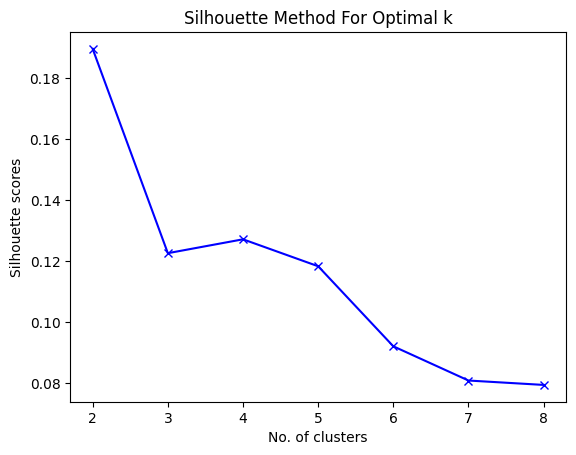

In [7]:
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette scores')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [8]:
best_k = np.nanargmax(silhouette_scores)+2

In [9]:
print("The best K value for silhouette method is:",best_k)

The best K value for silhouette method is: 2


In [10]:
kmeans = KMeans(n_clusters=best_k, random_state=seed, n_init=20, max_iter=500).fit(data)

In [11]:
clustered_data =  pd.DataFrame()
clustered_data['cluster'] = pd.Categorical(kmeans.labels_)

In [12]:
clustered_data = clustered_data.reset_index()
clustered_data = clustered_data.rename(columns={"index":"index"})

In [13]:
clustered_data.shape

(48842, 2)

In [14]:
clustered_data.to_csv('data/cluster_index_KMeans.csv',index=False)

In [15]:
centroids = pd.DataFrame(kmeans.cluster_centers_)

In [16]:
cols = [*range(300)]
cols = map(str, cols)
cols = list(cols)
cols = map(lambda c : 'col'+c,cols)
cols = list(cols)

In [17]:
centroids.columns=cols

In [18]:
centroids.shape

(2, 300)

In [19]:
centroids.to_csv('data/kmeans_centroids.csv',index=False)